In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

files = ['C_high','C_low','C_medium','D_high','D_low','D_medium','In_low','In_high','In_medium',
         'Ir_high','Ir_low','Ir_medium','Jay_high','Jay_low','Jay_medium','Su_high','Su_low','Su_medium']

In [4]:
from spectral_connectivity import Multitaper, Connectivity

file = 'C_high'
data = np.load('data/preprocess/' +file+ '.npy')
data.shape
x,y = data[0][1], data[0][0]
print(x.shape, y.shape)

start_time = time.time()
m = Multitaper(time_series=np.array([x,y]).transpose(),sampling_frequency=250, n_fft_samples=125)
c = Connectivity.from_multitaper(m)
matrix = c.partial_directed_coherence()

print("--- %s seconds ---" % (time.time() - start_time))
matrix

(750,) (750,)
--- 0.11679720878601074 seconds ---


array([[[[0.77425632, 0.99595177],
         [0.22574368, 0.00404823]],

        [[0.98340977, 0.95644059],
         [0.01659023, 0.04355941]],

        [[0.92329005, 0.98255371],
         [0.07670995, 0.01744629]],

        [[0.6827126 , 0.78709708],
         [0.3172874 , 0.21290292]],

        [[0.98698507, 0.94106517],
         [0.01301493, 0.05893483]],

        [[0.602152  , 0.66000158],
         [0.397848  , 0.33999842]],

        [[0.94667037, 0.96037114],
         [0.05332963, 0.03962886]],

        [[0.81782627, 0.66058287],
         [0.18217373, 0.33941713]],

        [[0.9869422 , 0.96754845],
         [0.0130578 , 0.03245155]],

        [[0.94995178, 0.93112442],
         [0.05004822, 0.06887558]],

        [[0.90220885, 0.72069455],
         [0.09779115, 0.27930545]],

        [[0.93616342, 0.89033151],
         [0.06383658, 0.10966849]],

        [[0.95333302, 0.95017712],
         [0.04666698, 0.04982288]],

        [[0.66265556, 0.96151006],
         [0.33734444, 0.03848

In [11]:
from spectral_connectivity import Multitaper, Connectivity
def partial_directed_coherence(x,y):
    m = Multitaper(time_series=np.array([x,y]).transpose(),sampling_frequency=250, n_fft_samples=125)
    c = Connectivity.from_multitaper(m)
    matrix = c.partial_directed_coherence()
    matrix = np.nan_to_num(matrix, nan=0)
    return matrix[0,:,0,1].mean()

start_time = time.time()
print(partial_directed_coherence(x,y))
print("--- %s seconds ---" % (time.time() - start_time))

0.8681731280975916
--- 0.14214587211608887 seconds ---


In [14]:
files = ['C_high']    				# Files for which granger sausality is to be calculated

for file in files:
    print(file)
    data = np.load('data/preprocess/' +file+ '.npy')    # Replace with Loctaion of file on drive
    pdc = []
    for i in range(20): 
        print(i,end=' ')
        arr = np.zeros(shape=(3136))
        cnt = 0
        for j in range(56):
            #print(i,j, end=' ')
            for k in range(56):
                arr[cnt] = partial_directed_coherence( data[i][j], data[i][k] )
                cnt += 1
        pdc.append(arr)
    np.save('data/parameter/'+file+'_pdc.npy',pdc, allow_pickle=True)   # CHange to location where the file is to be save
    print(np.load('data/parameter/'+file+'_granger.npy').shape)

Computing the initial conditions using the Cholesky failed. Using a random initial condition.


C_high
0 

Computing the initial conditions using the Cholesky failed. Using a random initial condition.


(1, 3136)


In [17]:
matrix = np.load('data/parameter/'+file+'_granger.npy')
matrix[0][:1000]

array([1.86080780e-12, 5.28329639e-01, 6.44385055e-01, 5.25965340e-01,
       5.51714154e-01, 6.48737999e-01, 5.31531436e-01, 1.17661578e+00,
       6.48247052e-01, 4.46872818e-01, 4.33254965e-01, 6.69272047e-01,
       6.41264205e-01, 9.81103077e-01, 5.83282036e-01, 1.13960378e+00,
       8.60250428e-01, 4.33417595e-01, 7.67113485e-01, 7.15203496e-01,
       1.11191129e+00, 5.25580275e-01, 5.57247243e-01, 5.64405725e-01,
       2.65280823e-01, 5.90306409e-01, 3.58732501e-01, 5.68112280e-01,
       6.38521633e-01, 8.24946145e-01, 3.45552207e-01, 4.03069136e-01,
       1.02424878e+00, 5.61143200e-01, 8.08865666e-01, 5.32615247e-01,
       7.53416875e-01, 1.06341672e+00, 8.41000143e-01, 9.43052536e-01,
       5.06701525e-01, 4.85519365e-01, 4.24606019e-01, 5.84076551e-01,
       3.15567214e-01, 4.78046193e-01, 4.93368764e-01, 1.02865955e+00,
       6.23590122e-01, 7.51172396e-01, 1.31363654e+00, 4.35649395e-01,
       8.67835144e-01, 6.29930701e-01, 4.57282909e-01, 6.27417465e-01,
      

<h1>PLV</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

files = ['C_high','C_low','C_medium','D_high','D_low','D_medium','In_low','In_high','In_medium',
         'Ir_high','Ir_low','Ir_medium','Jay_high','Jay_low','Jay_medium','Su_high','Su_low','Su_medium']

In [2]:
from spectral_connectivity import Multitaper, Connectivity

file = 'C_high'
data = np.load('data/preprocess/' +file+ '.npy')
data.shape
x,y = data[0][1], data[0][0]
print(x.shape, y.shape)

start_time = time.time()
m = Multitaper(time_series=np.array([x,y]).transpose(),sampling_frequency=250, n_fft_samples=125)
c = Connectivity.from_multitaper(m)
matrix = c.phase_locking_value()

print("--- %s seconds ---" % (time.time() - start_time))
matrix

(750,) (750,)
--- 0.12516283988952637 seconds ---


array([[[[ 1.        +0.j        , -0.6       +0.j        ],
         [-0.6       +0.j        ,  1.        +0.j        ]],

        [[ 1.        +0.j        , -0.02090639+0.83354162j],
         [-0.02090639-0.83354162j,  1.        +0.j        ]],

        [[ 1.        +0.j        , -0.07616959+0.56478526j],
         [-0.07616959-0.56478526j,  1.        +0.j        ]],

        [[ 1.        +0.j        ,  0.50538227-0.85657577j],
         [ 0.50538227+0.85657577j,  1.        +0.j        ]],

        [[ 1.        +0.j        ,  0.64472006-0.56925987j],
         [ 0.64472006+0.56925987j,  1.        +0.j        ]],

        [[ 1.        +0.j        , -0.93965838-0.00367845j],
         [-0.93965838+0.00367845j,  1.        +0.j        ]],

        [[ 1.        +0.j        ,  0.68700565-0.67046229j],
         [ 0.68700565+0.67046229j,  1.        +0.j        ]],

        [[ 1.        +0.j        , -0.95395285+0.03211887j],
         [-0.95395285-0.03211887j,  1.        +0.j        ]],

        

In [14]:
matrix[0,:,0,1]

array([-0.6       +0.j        , -0.02090639+0.83354162j,
       -0.07616959+0.56478526j,  0.50538227-0.85657577j,
        0.64472006-0.56925987j, -0.93965838-0.00367845j,
        0.68700565-0.67046229j, -0.95395285+0.03211887j,
        0.63453824-0.58440254j, -0.96024236-0.23384381j,
       -0.8285579 -0.31010538j,  0.13978208+0.8435524j ,
       -0.90746695-0.39734585j, -0.42507171-0.35871913j,
        0.81670166-0.2106156j ,  0.90444235-0.41811897j,
        0.02719361-0.86192227j,  0.24641638+0.6541273j ,
       -0.73680494-0.03595844j, -0.45061866-0.81558414j,
        0.91205668-0.38095403j,  0.97974447+0.15076681j,
        0.82827697-0.3981896j ,  0.96857948-0.15742908j,
        0.99169708-0.07527457j,  0.57414524-0.55806126j,
        0.05593882-0.59839315j,  0.16126215-0.59846641j,
        0.18715254-0.56354702j,  0.42989739-0.53443619j,
        0.51186847-0.48708901j,  0.5218351 -0.46592532j,
        0.52537095-0.44452433j,  0.55428305-0.41779277j,
        0.58654773-0.38475204j,

In [9]:
matrix[0][20][1][1] = 0
matrix = np.nan_to_num(matrix, nan=0)
matrix[0,:,0,1].mean()

(0.37378152098287215-0.2192350605883013j)

In [41]:
from spectral_connectivity import Multitaper, Connectivity
def phase_locking_value(x,y):
    m = Multitaper(time_series=np.array([x,y]).transpose(),sampling_frequency=250, n_fft_samples=125)
    c = Connectivity.from_multitaper(m)
    matrix = c.phase_locking_value()
    matrix = np.nan_to_num(matrix, nan=0)
    return matrix[0,:,0,1].mean()

start_time = time.time()
phase_locking_value(x,y)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.024899959564208984 seconds ---


In [ ]:
files = ['C_high']    				# Files for which granger sausality is to be calculated
plv = []

start_time = time.time()
for file in files:
    print(file)
    data = np.load('data/preprocess/' +file+ '.npy')    # Replace with Loctaion of file on drive
    granger = []
    for i in range(20): 
        print(i,end=' ')
        arr = np.zeros(shape=(1596), dtype=complex)
        cnt = 0
        for j in range(56):
            #print(i,j, end=' ')
            for k in range(j+1):
                arr[cnt] = phase_locking_value( data[i][j], data[i][k] )
                cnt += 1
        plv.append(arr)
    #np.save('data/parameter/'+file+'_granger.npy',granger, allow_pickle=True)   # CHange to location where the file is to be save
    #print(np.load('data/parameter/'+file+'_granger.npy'))
print("--- %s seconds ---" % (time.time() - start_time))

array([ 0.4934112 ,  0.48314226,  0.41112304, -0.48066392, -0.51236965,
        0.39783654,  0.08241747, -0.30479532, -0.43097973,  1.        ])

<h1>Coherence

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

files = ['C_high','C_low','C_medium','D_high','D_low','D_medium','In_low','In_high','In_medium',
         'Ir_high','Ir_low','Ir_medium','Jay_high','Jay_low','Jay_medium','Su_high','Su_low','Su_medium']

0.1801782700605447
--- 0.01198577880859375 seconds ---


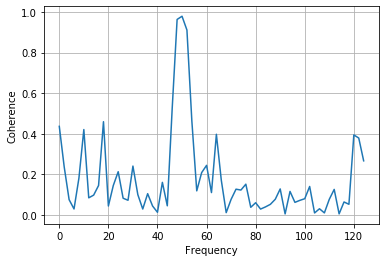

In [8]:
start_time = time.time()
coh, f = plt.cohere(x, y, NFFT=125,Fs=250, )#sides='onesided')
#plt.show()
print(np.mean(coh))
print("--- %s seconds ---" % (time.time() - start_time))
#coh,f

In [9]:
def coherence(x,y):
    coh, f = plt.cohere(x, y, NFFT=125,Fs=250, )#sides='onesided')
    return np.mean(coh)

In [19]:
coh = []
Y = []
files = ['C_high','C_low','C_medium','D_high','D_low','D_medium','In_low','In_high','In_medium',
         'Ir_high','Ir_low','Ir_medium','Jay_high','Jay_low','Jay_medium','Su_high','Su_low','Su_medium']
start_time = time.time()
for file in files:
    print(file)
    data = np.load('data/preprocess/' +file+ '.npy')
    for i in range(20): 
        print(i, end=' ')
        arr = np.zeros(shape=(1596))
        cnt = 0
        for j in range(56):
            for k in range(j+1):
                arr[cnt] = coherence(data[i][j], data[i][k])
                #print(j,k,cnt,end='   ')
                cnt += 1
        coh.append(arr)
        plt.clf()
    print("--- %s seconds ---" % (time.time() - start_time))
    
np.save('data/parameter/coherence.npy',coh, allow_pickle=True)
#np.save('data/parameter/Y.npy',Y, allow_pickle=True)

C_high
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 --- 66.49650835990906 seconds ---
C_low
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 --- 132.0658402442932 seconds ---
C_medium
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 --- 197.31378531455994 seconds ---
D_high
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 --- 263.3299102783203 seconds ---
D_low
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 --- 328.60367727279663 seconds ---
D_medium
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 --- 394.7721588611603 seconds ---
In_low
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 --- 462.72780871391296 seconds ---
In_high
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 --- 528.3645935058594 seconds ---
In_medium
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 --- 593.6337602138519 seconds ---
Ir_high
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 --- 659.6649186611176 seconds ---
Ir_low
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 --- 725.2707662582397 s

<Figure size 432x288 with 0 Axes>

<h1>Granger Causality</h1>

In [18]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

files = ['C_high','C_low','C_medium','D_high','D_low','D_medium','In_low','In_high','In_medium',
         'Ir_high','Ir_low','Ir_medium','Jay_high','Jay_low','Jay_medium','Su_high','Su_low','Su_medium']

In [16]:
from spectral_connectivity import Multitaper, Connectivity
def granger_cause(x,y):
    m = Multitaper(time_series=np.array([x,y]).transpose(),sampling_frequency=250, n_fft_samples=125)
    c = Connectivity.from_multitaper(m)
    matrix = c.pairwise_spectral_granger_prediction()
    matrix = np.nan_to_num(matrix, nan=0)
    return matrix[0,:,0,1].mean()

In [ ]:
start_time = time.time()
print(granger_cause(x,y))
print("--- %s seconds ---" % (time.time() - start_time))

for file in files:
    print(file)
    data = np.load('data/preprocess/' +file+ '.npy')
    granger = []
    for i in range(20): 
        #print(i,end=' ')
        arr = np.zeros(shape=(3136))
        cnt = 0
        for j in tqdm(range(56)):
            #print(i,j, end=' ')
            for k in range(56):
                arr[cnt] = granger_cause( data[i][j], data[i][k] )
                cnt += 1
        granger.append(arr)
    np.save('data/parameter/'+file+'_granger.npy',granger, allow_pickle=True)

In [22]:
np.load('data/parameter/C_high_granger.npy').shape

(2, 3136)

In [2]:
file = 'C_high'
data = np.load('data/preprocess/' +file+ '.npy')
data.shape
x,y = data[0][1], data[0][0]
x.shape, y.shape

start_time = time.time()
maxlag, test = 24, 'ssr_chi2test'
test_result = grangercausalitytests(np.array([x,y]).transpose(), maxlag=maxlag, verbose=False)
print(np.mean([round(test_result[i+1][0][test][1],4) for i in range(maxlag)]))
print("--- %s seconds ---" % (time.time() - start_time))
#np.mean(p_values)

0.09585833333333334
--- 0.3000342845916748 seconds ---


In [ ]:
maxlag, test = 24, 'ssr_chi2test'
granger = []

for file in files:
    print(file)
    data = np.load('data/preprocess/' +file+ '.npy')
    for i in range(20): 
        print(i,end=' ')
        arr = np.zeros(shape=(3136))
        cnt = 0
        for j in range(56):
            print(i,j, end=' ')
            for k in range(56):
                test_result = grangercausalitytests(np.array([ data[i][j], data[i][k] ]).transpose(), maxlag=maxlag, verbose=False)
                arr[cnt] = np.mean([round(test_result[i+1][0][test][1],4) for i in range(maxlag)])
                cnt += 1
        granger.append(arr)

<h1>PLI</h1> 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import hilbert

files = ['C_high','C_low','C_medium','D_high','D_low','D_medium','In_low','In_high','In_medium',
         'Ir_high','Ir_low','Ir_medium','Jay_high','Jay_low','Jay_medium','Su_high','Su_low','Su_medium'] #,'In_high'

In [16]:
pli = []
Y = []
for file in files:
    print(file)
    data = np.load('data/preprocess/' +file+ '.npy')
    for i in range(20): 
        print(i,end=' ')
        arr = np.zeros(shape=(3136))
        cnt = 0
        for j in range(56):
            #print(i,j, end=' ')
            for k in range(56):
                z_x = hilbert(data[i][j])
                phi_x = np.angle(z_x)
                z_y = hilbert(data[i][k])
                phi_y = np.angle(z_y)
                delta_phi = wraptopi(phi_x - phi_y)
                arr[cnt] = abs(np.mean(np.sign(delta_phi)))
                cnt += 1
        pli.append(arr)

np.save('data/parameter/pli.npy',pli, allow_pickle=True)

C_high
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 C_low
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 C_medium
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 D_high
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 D_low
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 D_medium
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 In_low
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 In_high
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 In_medium
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 Ir_high
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 Ir_low
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 Ir_medium
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 Jay_high
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 Jay_low
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 Jay_medium
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 Su_high
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 Su_low
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 Su_medium
0 1

<h1>Pearson_r

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
files = ['C_high','C_low','C_medium','D_high','D_low','D_medium','In_low','In_high','In_medium',
         'Ir_high','Ir_low','Ir_medium','Jay_high','Jay_low','Jay_medium','Su_high','Su_low','Su_medium'] #,'In_high'

In [21]:
pearson_r = []
Y = []
for file in files:
    print(file)
    data = np.load('data/preprocess/' +file+ '.npy')
    if file in ['C_high','D_high','In_high','Ir_high','Jay_high','Su_high']: y=2
    elif file in ['C_medium','D_medium','In_medium','Ir_medium','Jay_medium','Su_medium']: y=1
    else: y=0
    for i in range(20): 
        arr = np.zeros(shape=(1596))
        cnt = 0
        for j in range(56):
            for k in range(j+1):
                arr[cnt] = np.corrcoef(data[i][j], data[i][k])[0][1]
                #print(j,k,cnt,end='   ')
                cnt += 1
        pearson_r.append(arr)
        Y.append(y)

np.save('data/parameter/pearson_r.npy',pearson_r, allow_pickle=True)
np.save('data/parameter/Y.npy',Y, allow_pickle=True)

C_high
C_low
C_medium
D_high
D_low
D_medium
In_low
In_high
In_medium
Ir_high
Ir_low
Ir_medium
Jay_high
Jay_low
Jay_medium
Su_high
Su_low
Su_medium


In [22]:
np.load('data/parameter/pearson_r.npy').shape

(360, 1596)

<h1>Pre Processing and Saving

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from os import listdir
import glob

In [15]:
files = ['C_high','C_low','C_medium','D_high','D_low','D_medium','In_low','In_medium',
         'Ir_high','Ir_low','Ir_medium','Jay_high','Jay_low','Jay_medium','Su_high','Su_low','Su_medium'] #'In_high',

In [16]:
for file in files:
    print(file)
    #Loading Data
    filepath = 'data/' + file + '.csv'
    my_data = np.genfromtxt(filepath, delimiter=',')
    #Clipping 15,000
    my_data = my_data[:15000] 
    # Common average reference filter
    for i in range(len(my_data)):
        my_data[i] = my_data[i] - np.mean(my_data[i])
    # 3 Second split
    split = 3*250
    data = []
    for i in range(0, len(my_data), split):
        data.append(my_data[i:i+split].transpose())
    #print(data[0].shape)
    # Saving as file
    np.save('data/preprocess/' +file+ '.npy', data)

C_high
C_low
C_medium
D_high
D_low
D_medium
In_low
In_medium
Ir_high
Ir_low
Ir_medium
Jay_high
Jay_low
Jay_medium
Su_high
Su_low
Su_medium


In [4]:
#################### For IN High ############################
file = 'In_high'
filepath = 'data/' + file + '.csv'
my_data = np.genfromtxt(filepath, delimiter=',')
my_data.shape
for i in range(len(my_data)):
    my_data[i] = my_data[i] - np.mean(my_data[i])
split = 3*250
data = []
for i in range(0, 14250, split):
    data.append(my_data[i:i+split].transpose())
for j in range(664,750):
    data[19] = np.append(data[19], np.zeros(shape=(56,1),),axis=1)
np.save('data/preprocess/' +file+ '.npy', data)

20

In [17]:
np.load('data/preprocess/C_high.npy').shape

(20, 56, 750)